In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

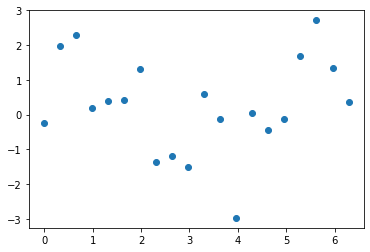

In [18]:
x = np.linspace(0,2*np.pi,20)
noise = np.random.normal(0,1,20)
target_samples = np.cos(x) + noise

plt.scatter(x,target_samples)
plt.show()

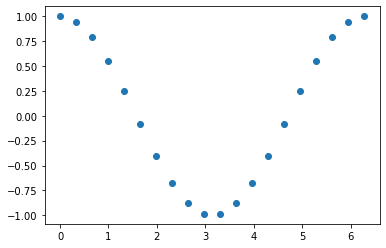

In [6]:
true_value = np.cos(x)

plt.scatter(x,true_value)
plt.show()

In [7]:
df = pd.DataFrame()
df['x'] = x
df['target_samples'] = target_samples
df

,x,target_samples
0,0.000000,1.208815
1,0.330694,0.134054
2,0.661388,0.106688
3,0.992082,1.267626
4,1.322776,2.496170
5,1.653470,0.646720
6,1.984164,-0.386489
7,2.314858,-1.767423
8,2.645552,-2.235580
9,2.976246,-0.610331


# Linear Regression

In [8]:
X = df[['x']]
y = df[['target_samples']]

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
y_pred = reg.predict(X)

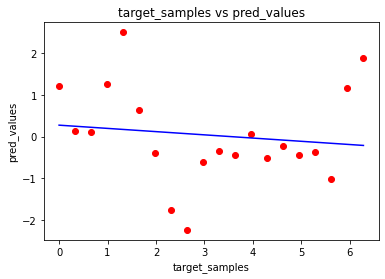

In [10]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('target_samples vs pred_values')
plt.xlabel('target_samples')
plt.ylabel('pred_values')
plt.show()

In [11]:
#Mean square error between the predicted values and the true values

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(true_value, y_pred)
MSE

0.5445299056975548

# Polynomial Regression of Degree M

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

X = df[['x']]
y = df[['target_samples']]

pol_reg = make_pipeline(PolynomialFeatures(), LinearRegression())
parms = {'polynomialfeatures__degree': np.arange(10)}
grid = GridSearchCV(pol_reg, parms, cv = 10, scoring='neg_mean_squared_error')
grid.fit(X,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

In [13]:
y_pred_PR = grid.predict(X)

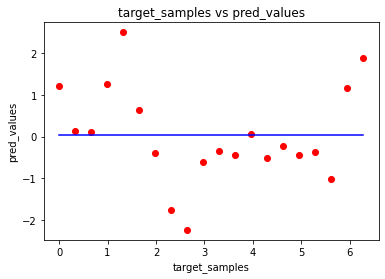

In [14]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred_PR, color = 'blue')
plt.title('target_samples vs pred_values')
plt.xlabel('target_samples')
plt.ylabel('pred_values')
plt.show()

In [15]:
#Mean square error between the predicted values and the true values

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(true_value, y_pred_PR)
MSE

0.522842353339123

In [20]:
test = np.linspace(0,2*np.pi,20)
noise = np.random.normal(0,1,20)
target_samples = np.cos(test) + noise

In [22]:
df = pd.DataFrame()
df['x'] = test
df['target_samples'] = target_samples
df

,x,target_samples
0,0.000000,1.509016
1,0.330694,0.966320
2,0.661388,1.790408
3,0.992082,1.323048
4,1.322776,-0.185512
5,1.653470,-0.499058
6,1.984164,0.076542
7,2.314858,-0.230724
8,2.645552,-1.554908
9,2.976246,-2.089002


In [23]:
X = df[['x']]
y = df[['target_samples']]

In [24]:
y_pred_PR = grid.predict(X)

In [25]:
#Mean square error between the predicted values and the true values

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test, y_pred_PR)
MSE

13.308863727778427